# Obtaining the tSZ and kSZ angular power spectrum from random forests
      

This notebook gives examples of how to obtain and plot the tSZ and kSZ angular power spectra $C_\ell$ given a set of cosmological parameters.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.insert(1,"./")
sys.path.insert(1,"./tszcl_src/")

In [3]:
from Highell_Cls import Cl_tsz_fromRF, Cl_ksz_fromRF

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors, cm, rc
rc('font',**{'size': 16})

In [5]:
%load_ext autoreload
%autoreload 2

## Thermal SZ: example

Define the dictionary containing the parameter values.

In [6]:
C_SR_params={"bias": 0.8,
            "H0": 64,
            "omb": 0.05,
            "om": 0.31,
            "sig8": 0.8,
            "alpha":1.77}

The `Cl_tsz_fromRF` outputs the tSZ angular power spectrum at 143GHz for $2 \leq \ell \leq 13500$.

In [7]:
ell_ref, Cl_ref = Cl_tsz_fromRF(C_SR_params, coeff_path="tszcl_coeff/")

Text(0.5, 0, 'Angular multipole $\\ell$')

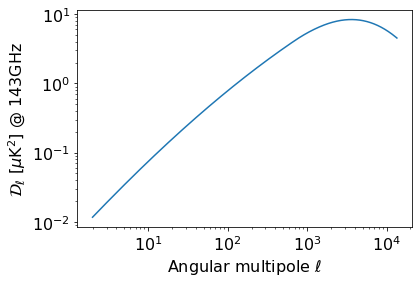

In [8]:
plt.loglog(ell_ref, Cl_ref)
plt.ylabel(r"$\mathcal{D}_\ell~[\mu \mathrm{K}^2]$ @ 143GHz")
plt.xlabel(r"Angular multipole $\ell$")

Plot for a range of parameter values:

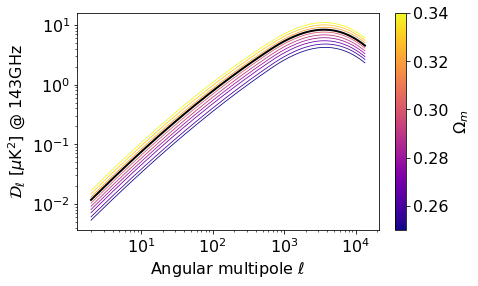

In [9]:
om_range =  0.25+0.01*np.arange(10)
cmap = cm.get_cmap('plasma')
norm = colors.Normalize(vmin=np.min(om_range), vmax=np.max(om_range)) 

plt.loglog(ell_ref, Cl_ref, linewidth=2.0, color='k', zorder=2)
for om in om_range:
    C_SR_params={"bias": 0.8,
            "H0": 64,
            "omb": 0.05,
            "om": om,
            "sig8": 0.8,
            "alpha":1.77}
    ell_ref, Cl_i = Cl_tsz_fromRF(C_SR_params, coeff_path="tszcl_coeff/")
    plt.loglog(ell_ref, Cl_i, color=cmap(norm(om)), zorder=0, lw=.8)
plt.ylabel(r"$\mathcal{D}_\ell~[\mu \mathrm{K}^2]$ @ 143GHz")
plt.xlabel(r"Angular multipole $\ell$")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
c_bar=plt.colorbar(sm, fraction=0.05)
c_bar.set_label(r'$\Omega_m$')

## Kinetic SZ: example

The following shows how to use the RF coefficients and related python functions to obtain the patchy and late-time kSZ angular power spectra $\mathcal{D}_\ell$ for a set of cosmological and reionisation parameters. Note that
\begin{equation}
\mathcal{D}_\ell = \frac{\ell(\ell+1)}{2\pi} C_\ell
\end{equation}
is expressed in $\mu\mathrm{K}^2$.

1. Define dictionary containing the values of the cosmological parameters 

In [10]:
KSZ_params={"omegabh2": 0.0224,
            "omegach2": 0.120,
            "ns": 0.9665,
            "theta": 1.041,
            "logA": 3.044,
            "zre": 7.5,
            "dz": 1.2,
            "logalpha0": 3.7,
            "kappa": 0.10}

2. The `Cl_ksz_fromRF` outputs the two kSZ angular power spectra at the $\ell$ bins the RF were trained at ($2 \leq \ell \leq 13\,500$).

In [11]:
ells, hksz, pksz = Cl_ksz_fromRF(param_dict=KSZ_params,
                                 coeff_path="./kszcl_coeff/")

In [12]:
ind = np.argmin(abs(ells-3000.))
print('D3000 (hksz) = {:.2e} muK2'.format(hksz[ind]))

D3000 (hksz) = 3.10e+00 muK2


Text(0.5, 0, 'Angular multipole $\\ell$')

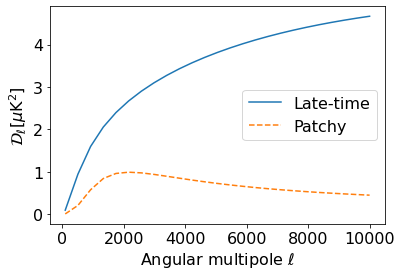

In [13]:
plt.figure()
plt.plot(ells, hksz, ls='-', lw=1.5, label='Late-time')
plt.plot(ells, pksz, ls='--', lw=1.5, label='Patchy')
plt.legend()
plt.ylabel(r"$\mathcal{D}_\ell [\mu \mathrm{K}^2]$")
plt.xlabel(r"Angular multipole $\ell$")